<a href="https://colab.research.google.com/github/vasu1709/upskillcampus/blob/main/Prediction_of_Agriculture_Crop_Production_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Loading the data**

In [4]:
df = pd.read_csv('/content/crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


**Ensuring the data correctness**

In [5]:
df.isnull().sum()

,0
State_Name,0
District_Name,1
Crop_Year,1
Season,1
Crop,1
Area,1
Production,1890


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


In [8]:
df = df[df['Production'] !=0]

**Null values removed**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83030 entries, 0 to 85732
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     83030 non-null  object 
 1   District_Name  83030 non-null  object 
 2   Crop_Year      83030 non-null  float64
 3   Season         83030 non-null  object 
 4   Crop           83030 non-null  object 
 5   Area           83030 non-null  float64
 6   Production     83030 non-null  float64
dtypes: float64(3), object(4)
memory usage: 5.1+ MB


In [10]:
df['Crop_Year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2010., 1997.,
       1998., 1999., 2007., 2008., 2009., 2011., 2012., 2013., 2014.])

**How many States and union teritorry**

In [11]:
len(df['State_Name'].unique())

15

In [12]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka'], dtype=object)

In [13]:
df['District_Name'].nunique()

246

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Production'].sort_values(ascending = False)

,Production
2543,780162000.00
2432,729965000.00
2488,720895000.00
2378,719961050.00
9829,718991000.00
...,...
75181,0.10
71731,0.10
75155,0.10
57044,0.08


In [15]:
no_of_diff_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)

There are 87 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal'
 'Citrus Fruit' 'Grapes' 'Mango' 'Orange' 'Other Fresh Fruits' 'Papaya'
 'Pome Fruit' 'Tomato' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Niger seed'
 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp

In [16]:
df['Season'].value_counts()

,count
Season,
Kharif,31337
Rabi,24952
Whole Year,19616
Summer,4007
Autumn,1720
Winter,1398


**Data Analysis and Visualization**

<Axes: xlabel='Season', ylabel='count'>

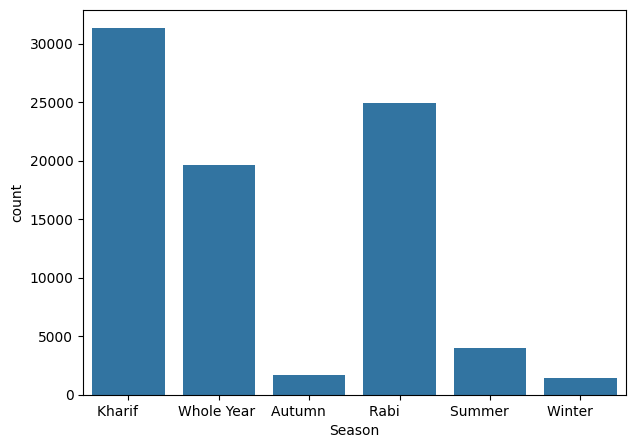

In [17]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season')

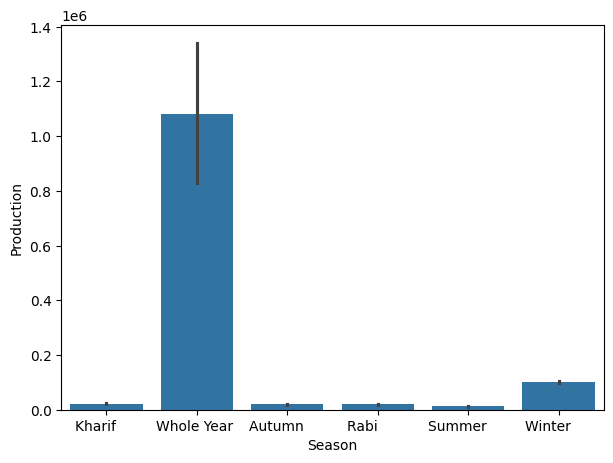

In [18]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

In [19]:
state_prod = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
px.bar(state_prod , 'State_Name', 'Production')

In [20]:
state_prod

,State_Name,Production
1,Andhra Pradesh,17324590296.00
3,Assam,2111751759.00
0,Andaman and Nicobar Islands,718223239.99
9,Gujarat,524291337.00
14,Karnataka,516211633.16
8,Goa,505755757.58
10,Haryana,381273890.00
4,Bihar,366483596.66
6,Chhattisgarh,100951908.01
11,Himachal Pradesh,17805168.60


In [21]:
df.groupby('State_Name').sum()['Production'].nlargest()

,Production
State_Name,
Andhra Pradesh,17324590296.00
Assam,2111751759.00
Andaman and Nicobar Islands,718223239.99
Gujarat,524291337.00
Karnataka,516211633.16


In [22]:
df.groupby("State_Name").sum()['Production'].nsmallest()

,Production
State_Name,
Chandigarh,63956.50
Dadra and Nagar Haveli,1847871.00
Arunachal Pradesh,6823912.60
Jharkhand,10777741.75
Jammu and Kashmir,13291015.70


In [23]:
df['Area'].shape

(83030,)

In [24]:
df.groupby(['State_Name','Crop_Year']).sum()['Production']

State_Name                   Crop_Year
Andaman and Nicobar Islands  2000.00     89060914.00
                             2001.00     89718700.00
                             2002.00     94387137.67
                             2003.00     95296454.67
                             2004.00     87186497.63
                                             ...    
Karnataka                    2010.00     41945419.40
                             2011.00     39311817.10
                             2012.00     35610667.00
                             2013.00     38371395.00
                             2014.00     41481565.00
Name: Production, Length: 218, dtype: float64

In [25]:
dist_prod = df.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')
dist = dist_prod[0:5]
px.bar(dist , 'District_Name', 'Production')

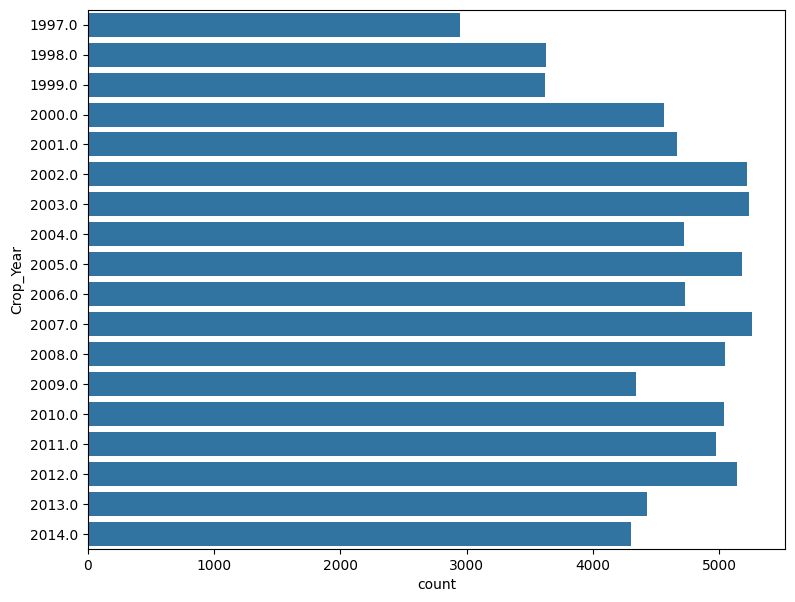

In [26]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=df,y='Crop_Year');

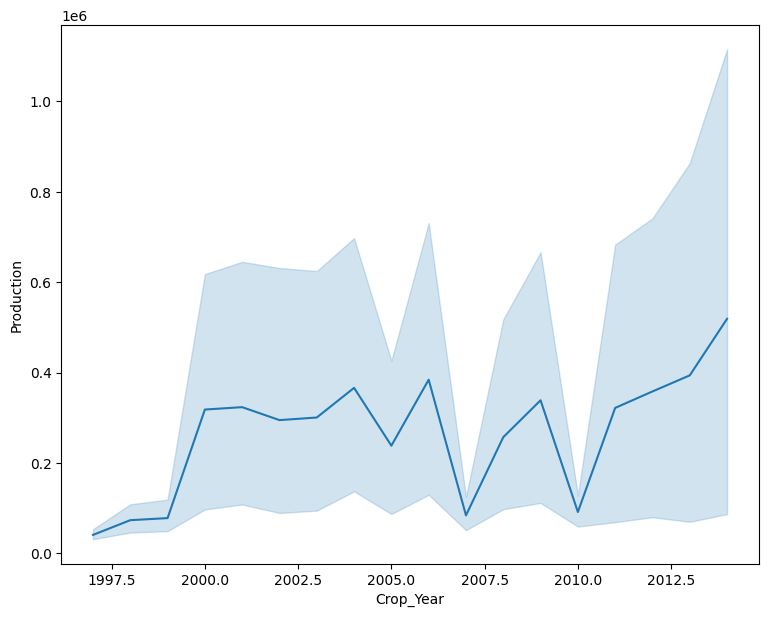

In [27]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

In [28]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.00,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000.00,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000.00,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000.00,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000.00,Whole Year,Cashewnut,720.00,165.00


<ipython-input-29-421091d7feff>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




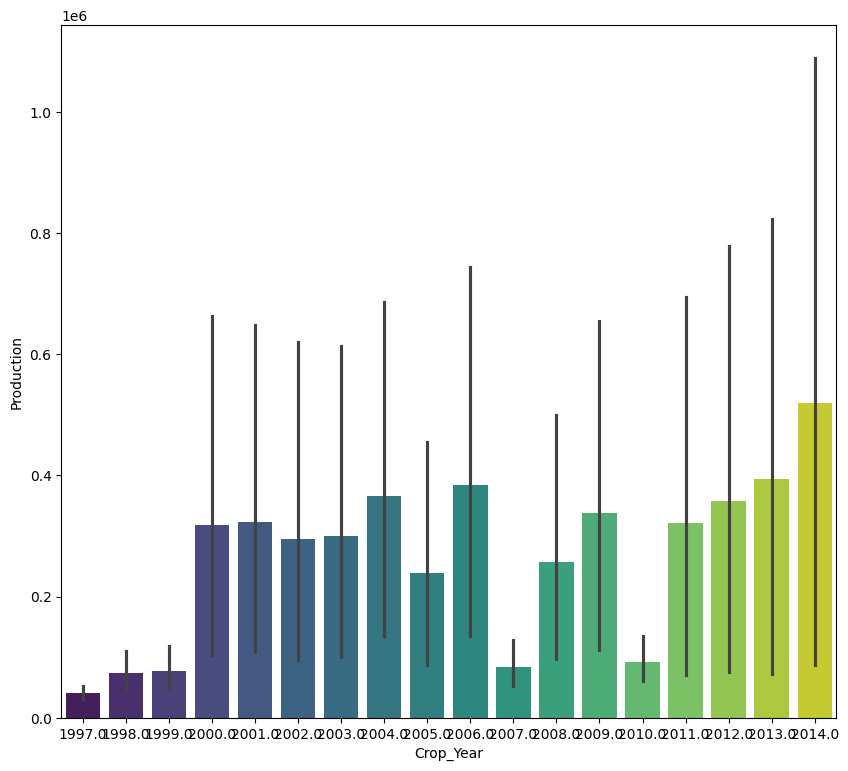

In [29]:
plt.figure(figsize=(10,9),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production',palette='viridis');

In [30]:
df.groupby('Season').sum()['Production']

,Production
Season,
Autumn,33802068.79
Kharif,692757213.88
Rabi,479744028.89
Summer,50238415.00
Whole Year,21202002309.74
Winter,141599047.25


**Analyzing kerala data**

In [31]:
kerala_data = df[df['State_Name'] == 'Kerala']
kerala_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [32]:
top_prod_kerala = kerala_data.groupby('Crop').sum()["Production"].reset_index().sort_values(by='Production',ascending=False).nlargest(n=10,columns='Production')
top_prod_kerala

,Crop,Production


<Axes: >

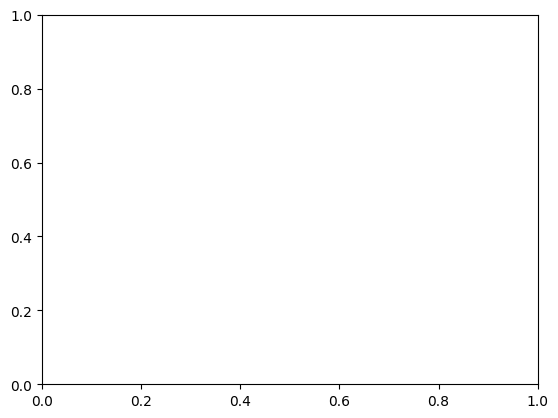

In [33]:
sns.barplot(data=top_prod_kerala,y='Crop',x='Production')

In [34]:
kerala_district = kerala_data.groupby('District_Name').sum()['Production'].reset_index().sort_values(by='Production',ascending=False)
kerala_district

,District_Name,Production


<Axes: >

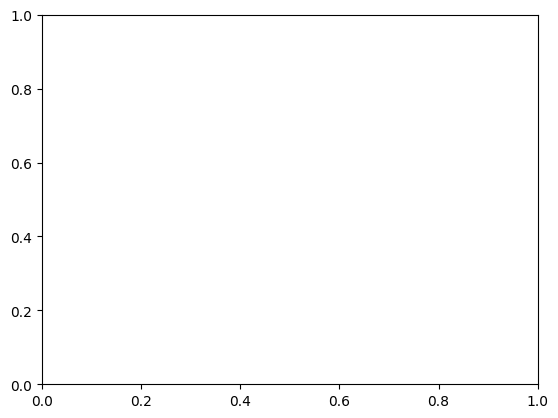

In [35]:
sns.barplot(data=kerala_district,y='District_Name',x='Production')

**Analyzing data across states in India**

In [36]:
df.groupby('Season').sum()['Production'].nlargest()

,Production
Season,
Whole Year,21202002309.74
Kharif,692757213.88
Rabi,479744028.89
Winter,141599047.25
Summer,50238415.00


In [37]:
df['Crop'].value_counts().reset_index()

,Crop,count
0,Rice,5697
1,Maize,4783
2,Moong(Green Gram),3304
3,Wheat,2933
4,Dry chillies,2718
...,...,...
82,Cashewnut Processed,8
83,Cashewnut Raw,8
84,Turnip,6
85,Carrot,2


In [38]:
india_top_prod = df.groupby('Crop').sum()['Production'].nlargest(20).reset_index() #Top 20 best performing crops
india_top_prod

,Crop,Production
0,Coconut,19997497126.90
1,Sugarcane,1068576041.48
2,Rice,491518132.29
3,Wheat,292508039.10
4,Cotton(lint),132526616.60
5,Maize,101890184.77
6,Groundnut,60733183.30
7,Banana,60727542.65
8,Potato,52208044.56
9,Bajra,35565428.70


<Axes: xlabel='Production', ylabel='Crop'>

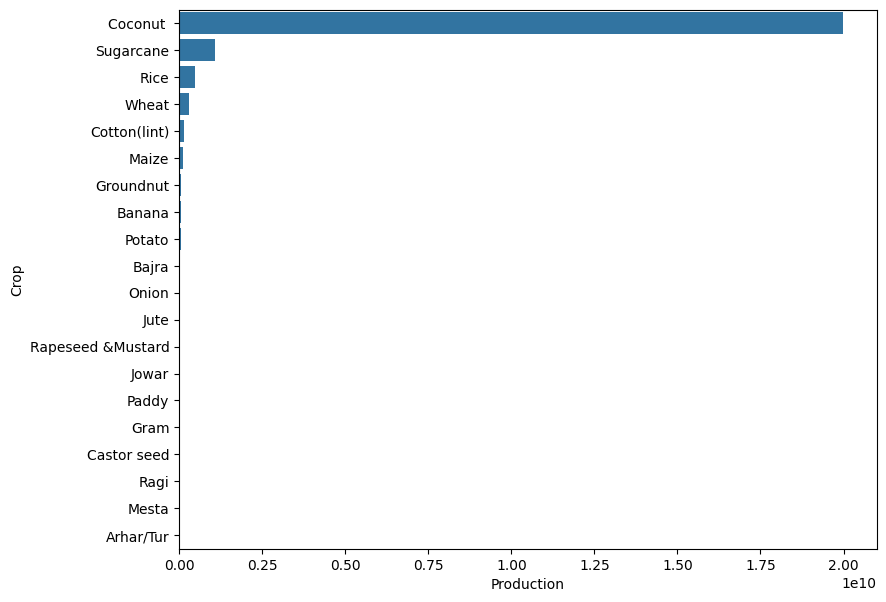

In [39]:
plt.figure(figsize=(9,7),dpi=100)
sns.barplot(data=india_top_prod,x='Production',y='Crop')

In [40]:
df.groupby('Crop').sum()['Production'].nsmallest(20).reset_index()

,Crop,Production
0,Carrot,22.00
1,Redish,230.00
2,Turnip,363.00
3,Cond-spcs other,2260.40
4,Cardamom,3256.00
5,Cashewnut Processed,4552.00
6,Varagu,6355.00
7,other misc. pulses,8098.01
8,Cashewnut Raw,18147.00
9,Blackgram,41659.00


**Analyzing coconut**

In [41]:
coconut_crop = df[df['Crop'] == 'Coconut ']
coconut_crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000.00,Whole Year,Coconut,18168.00,65100000.00
14,Andaman and Nicobar Islands,NICOBARS,2001.00,Whole Year,Coconut,18190.00,64430000.00
23,Andaman and Nicobar Islands,NICOBARS,2002.00,Whole Year,Coconut,18240.00,67490000.00
32,Andaman and Nicobar Islands,NICOBARS,2003.00,Whole Year,Coconut,18284.74,68580000.00
41,Andaman and Nicobar Islands,NICOBARS,2004.00,Whole Year,Coconut,18394.70,52380000.00
...,...,...,...,...,...,...,...
85548,Karnataka,DAKSHIN KANNAD,2014.00,Whole Year,Coconut,18407.00,282127.00
85594,Karnataka,DAVANGERE,1998.00,Whole Year,Coconut,12423.00,72710.00
85637,Karnataka,DAVANGERE,1999.00,Whole Year,Coconut,13044.00,76345.00
85684,Karnataka,DAVANGERE,2000.00,Whole Year,Coconut,12343.00,72242.00


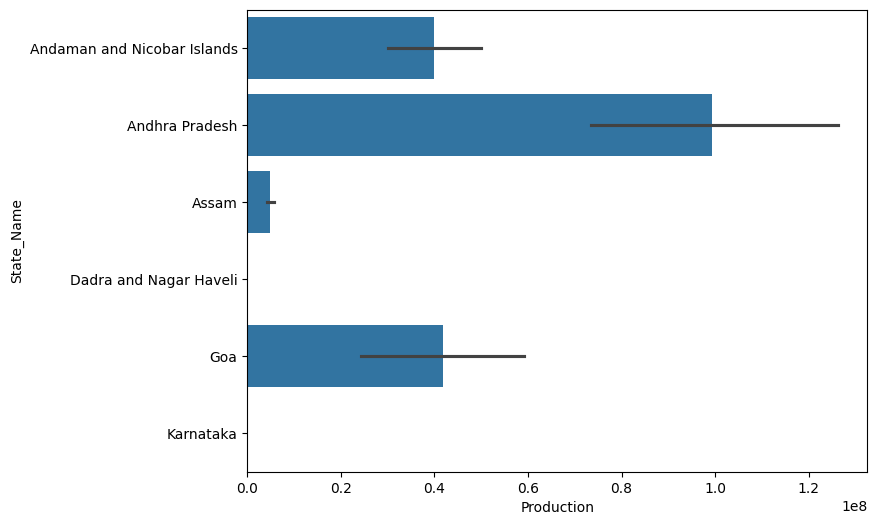

In [42]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=coconut_crop,x='Production',y='State_Name');

In [43]:
coconut_districts = coconut_crop.groupby('District_Name').sum()['Production'].nlargest().reset_index()
px.bar(data_frame=coconut_districts,x='District_Name',y='Production')

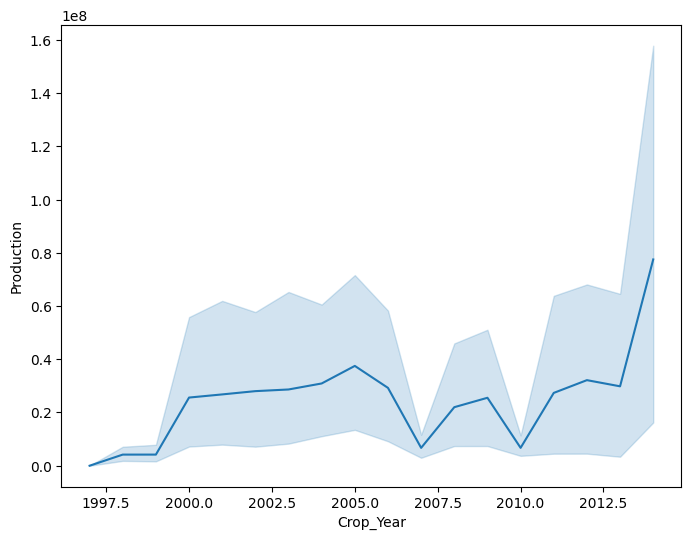

In [44]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=coconut_crop,x='Crop_Year',y='Production');

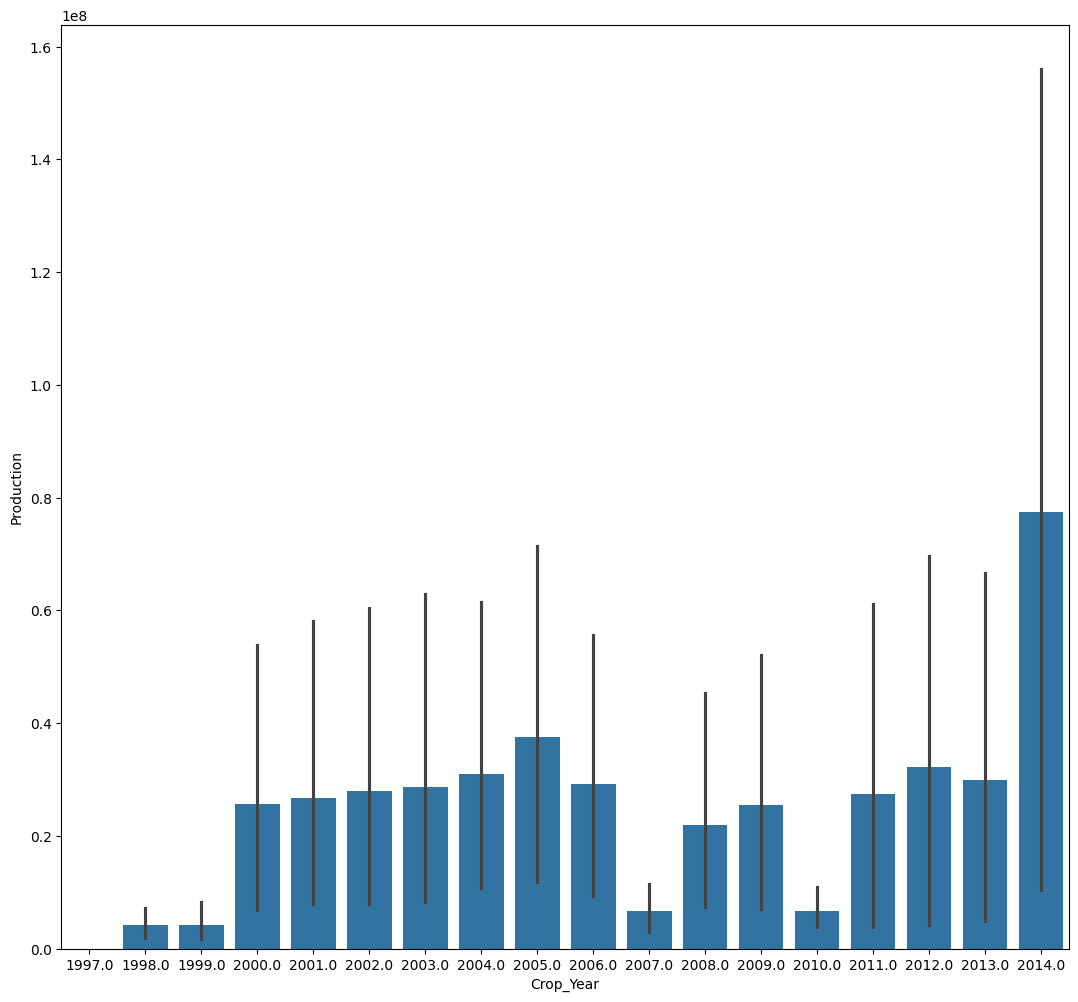

In [45]:
plt.figure(figsize=(13,12),dpi=100)
sns.barplot(data=coconut_crop,x='Crop_Year',y='Production');

In [46]:
coconut_crop.groupby('Season').sum()['Production'].nlargest()

,Production
Season,
Whole Year,19997379838.90
Kharif,117288.00


In [47]:
coconut_season = coconut_crop.groupby('Season').sum()['Production'].reset_index()
px.bar(data_frame=coconut_season,x='Season',y='Production')


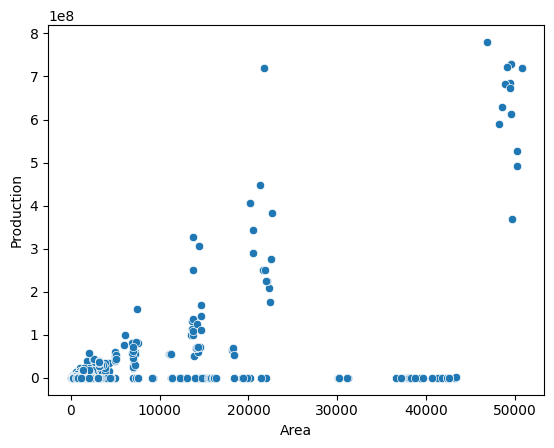

In [48]:
sns.scatterplot(data=coconut_crop,x='Area',y='Production');

**Analyzing Sugarcane**

In [49]:
sugarcane_crop = df[df['Crop'] == 'Sugarcane']

In [50]:
sugarcane_crop.shape

(2451, 7)

In [51]:
sugarcane_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7,Andaman and Nicobar Islands,NICOBARS,2000.00,Whole Year,Sugarcane,1.00,2.00
16,Andaman and Nicobar Islands,NICOBARS,2001.00,Whole Year,Sugarcane,1.00,1.00
26,Andaman and Nicobar Islands,NICOBARS,2002.00,Whole Year,Sugarcane,5.00,40.00
60,Andaman and Nicobar Islands,NICOBARS,2006.00,Whole Year,Sugarcane,0.20,0.50
65,Andaman and Nicobar Islands,NICOBARS,2010.00,Autumn,Sugarcane,13.40,41.75


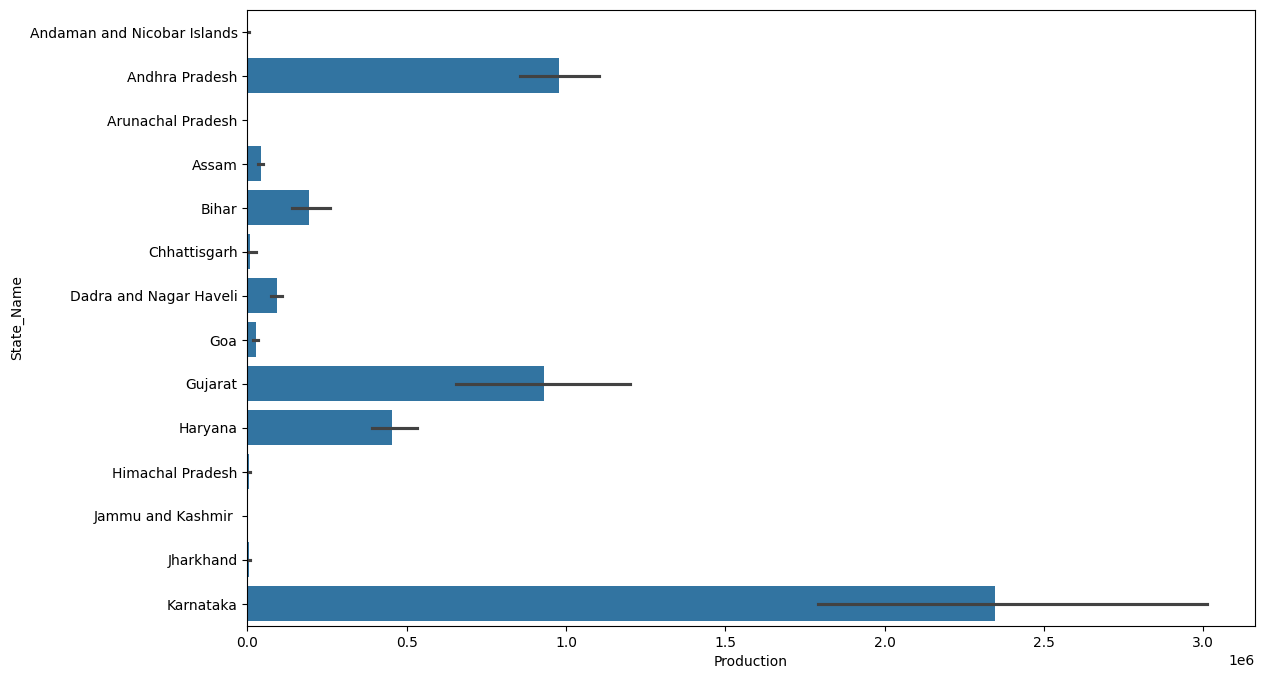

In [52]:
plt.figure(figsize=(13,8),dpi=100)
sns.barplot(data=sugarcane_crop,x='Production',y='State_Name');

In [53]:
sugarcane_crop.groupby('State_Name').sum()['Production'].nlargest().reset_index()

,State_Name,Production
0,Karnataka,387106272.00
1,Andhra Pradesh,226730305.00
2,Gujarat,212022800.00
3,Haryana,112680900.00
4,Bihar,106227183.00


In [54]:
sugarcane_districts = sugarcane_crop.groupby('District_Name').sum()['Production'].nlargest().reset_index()
px.bar(data_frame=sugarcane_districts,x='District_Name',y='Production')

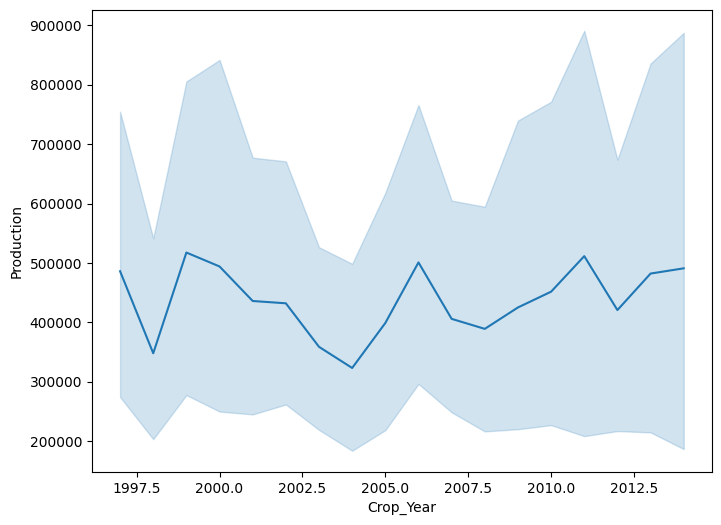

In [55]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=sugarcane_crop,x='Crop_Year',y='Production');


<ipython-input-56-f54b540bec83>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




We can also see that result in the following graph


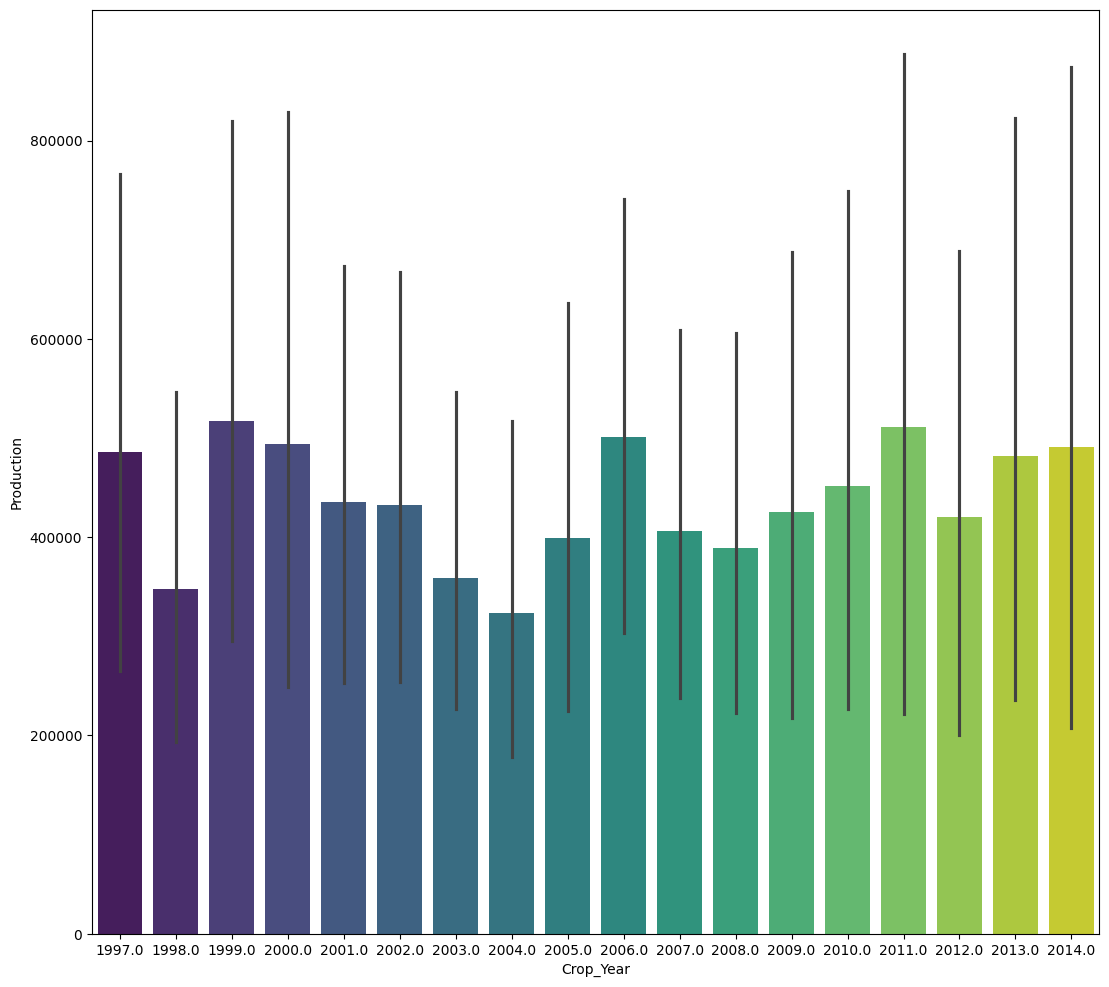

In [56]:
plt.figure(figsize=(13,12),dpi=100)
sns.barplot(data=sugarcane_crop,x='Crop_Year',y='Production',palette='viridis');

print('We can also see that result in the following graph')

In [57]:
sugarcane_crop.groupby('Season').sum()['Production'].nlargest()

,Production
Season,
Whole Year,1018879416.63
Kharif,48563490.90
Winter,1115995.00
Rabi,15806.00
Autumn,1332.95


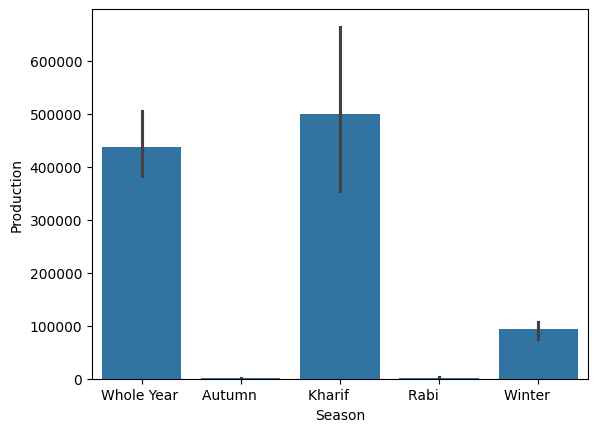

In [58]:
sns.barplot(data=sugarcane_crop,x='Season',y='Production');

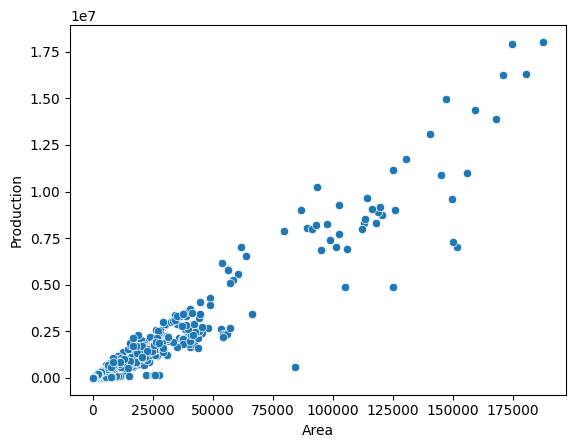

In [59]:
sns.scatterplot(data=sugarcane_crop,x='Area',y='Production');


**Analyzing Rice**

In [60]:
rice_crop = df[df['Crop'] == 'Rice']
rice_crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000.00,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001.00,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002.00,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003.00,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004.00,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
85633,Karnataka,DAVANGERE,1999.00,Summer,Rice,52272.00,176784.00
85658,Karnataka,DAVANGERE,2000.00,Kharif,Rice,70115.00,247086.00
85679,Karnataka,DAVANGERE,2000.00,Summer,Rice,46630.00,170151.00
85706,Karnataka,DAVANGERE,2001.00,Kharif,Rice,67016.00,227128.00


<Axes: xlabel='Crop_Year', ylabel='Production'>

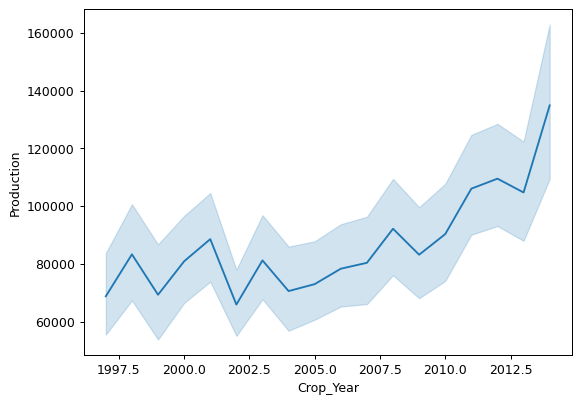

In [61]:
plt.figure(figsize=(7,5),dpi=90)
sns.lineplot(data=rice_crop,x='Crop_Year',y='Production')

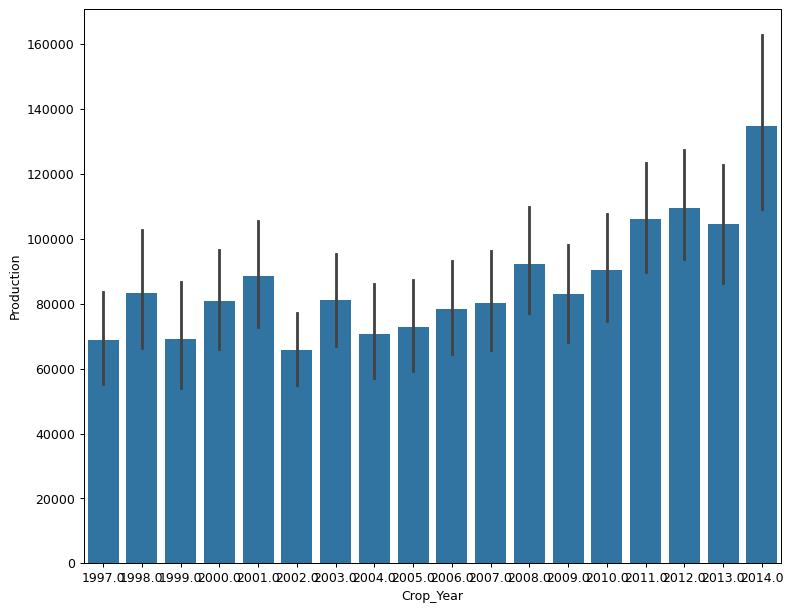

In [62]:
plt.figure(figsize=(10,8),dpi=90)
sns.barplot(data=rice_crop,x='Crop_Year',y='Production');


In [63]:
rice_states = rice_crop.groupby('State_Name').sum()['Production'].reset_index()
px.bar(data_frame=rice_states,x='State_Name',y='Production')


In [64]:
rice_crop.groupby('State_Name').sum()['Production'].nlargest().reset_index()

,State_Name,Production
0,Andhra Pradesh,143742455.00
1,Bihar,92022922.00
2,Chhattisgarh,81498618.00
3,Assam,71801090.00
4,Haryana,49318300.00


In [65]:
rice_districts = rice_crop.groupby('District_Name').sum()['Production'].nlargest(10).reset_index()
px.bar(data_frame=rice_districts,x='District_Name',y='Production')


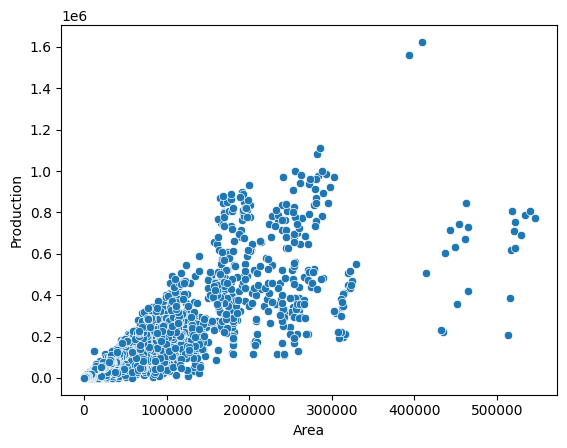

In [66]:
sns.scatterplot(data=rice_crop,x='Area',y='Production');


In [67]:
rice_season = rice_crop.groupby('Season').sum()['Production'].reset_index()
px.bar(data_frame=rice_season,x='Season',y='Production')

**Creating Linear regression model**

In [68]:
crop_data = pd.get_dummies(data=df)
crop_data.head()

,Crop_Year,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,2000.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000.00,2.00,1.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000.00,102.00,321.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000.00,176.00,641.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000.00,720.00,165.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
from sklearn.model_selection import train_test_split
X = crop_data.drop('Production',axis=1)
X.head()

,Crop_Year,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000.00,2.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000.00,102.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000.00,176.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000.00,720.00,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
y = crop_data['Production']
y.head()

,Production
0,2000.00
1,1.00
2,321.00
3,641.00
4,165.00


In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_test.shape

(27400, 356)

In [72]:
y_test.shape

(27400,)

In [73]:
from sklearn.linear_model import LinearRegression
crop_model = LinearRegression()

In [74]:
crop_model.fit(X_train,y_train)

LinearRegression()

In [75]:
crop_predictions = crop_model.predict(X_test)
crop_predictions

array([  102816.05078125,    27007.31640625, 10176140.47265625, ...,
        -516015.38476562,  -447521.13867188,  -203818.6328125 ])

In [76]:
crop_model.coef_

array([ 1.63362024e+04,  7.67135791e+00,  4.01582448e+13,  8.87227630e+12,
        4.71779528e+12,  6.31906940e+12,  1.66090795e+12,  3.29863791e+12,
        2.77196482e+12, -8.73500925e+12,  5.00583531e+12,  3.51229775e+12,
        2.31425836e+12,  2.77196497e+12,  4.72618330e+12,  3.49328211e+12,
        2.77196410e+12,  3.02426242e+11,  1.50046567e+12,  3.02426227e+11,
        3.02426278e+11, -5.05755246e+12, -9.11459208e+11, -9.03071295e+11,
        2.15381607e+12,  2.15381603e+12,  2.15381602e+12, -9.11459211e+11,
        1.04275948e+12, -2.50434596e+12,  1.04275912e+12,  1.04275910e+12,
        1.04275912e+12,  3.02426177e+11, -9.11459240e+11,  1.04275943e+12,
        2.15381605e+12, -9.11459223e+11, -2.50434604e+12,  1.04275919e+12,
        2.15381607e+12,  1.04275967e+12,  1.04275940e+12,  1.04275909e+12,
        1.04275928e+12,  2.15381606e+12,  3.02426380e+11,  3.02426237e+11,
        1.50046553e+12,  2.15381606e+12,  1.04275944e+12,  1.04275924e+12,
        1.04275916e+12,  

In [77]:
predicted_crop_val = pd.DataFrame({'Actual':y_test,'Predicted':crop_predictions})
predicted_crop_val

,Actual,Predicted
11675,656.00,102816.05
56073,93.00,27007.32
2226,14165.00,10176140.47
21623,1.00,-901208.24
78218,230.00,-783752.77
...,...,...
8062,7864.00,1138441.54
56248,381.00,-91241.52
80782,159.00,-516015.38
77694,3766.00,-447521.14


In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
df['Production'].mean()

272192.49769420695

In [79]:
crop_predictions.mean()
mean_absolute_error(y_test,crop_predictions)
mean_squared_error(y_test,crop_predictions)
np.sqrt(mean_squared_error(y_test,crop_predictions))


9320818.131723573

In [80]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test,crop_predictions)

1672595.801235855

In [81]:
test_residuals = y_test - crop_predictions
test_residuals

,Production
11675,-102160.05
56073,-26914.32
2226,-10161975.47
21623,901209.24
78218,783982.77
...,...
8062,-1130577.54
56248,91622.52
80782,516174.38
77694,451287.14


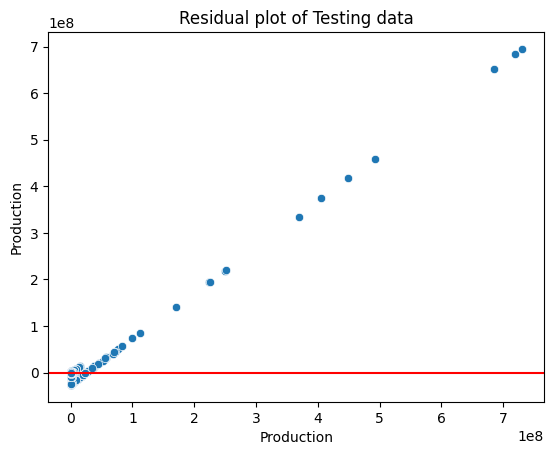

In [82]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Testing data');

In [83]:
r = r2_score(y_test,crop_predictions)
print("R2score when we predict using Linear Regression is ",r)

R2score when we predict using Linear Regression is  0.08872052805179587


In [84]:
train_set_predictions = crop_model.predict(X_train)
train_set_predictions

array([-382385.3984375 ,  -77704.01171875,  111451.16992188, ...,
       -399156.50976562,  -23342.45703125,   34084.01367188])

In [85]:
train_set_predictions.mean()

264199.5662296156

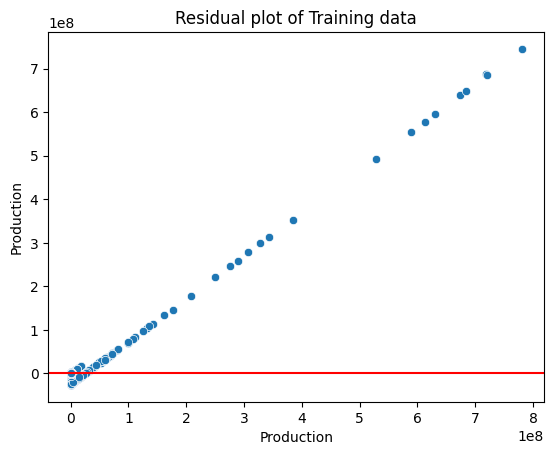

In [86]:
sns.scatterplot(x=y_train,y=y_train-train_set_predictions)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Training data');

In [87]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_train,train_set_predictions)

1877716.1767587785